In [121]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(
    n_samples=500, n_features=3, centers=6, random_state=42, cluster_std=5.0,center_box=(-10,10))
X=StandardScaler().fit_transform(X)

In [122]:
from sklearn.model_selection import train_test_split

xtr,xtst,ytr,ytst = train_test_split(X, y, test_size=0.5, random_state=42)

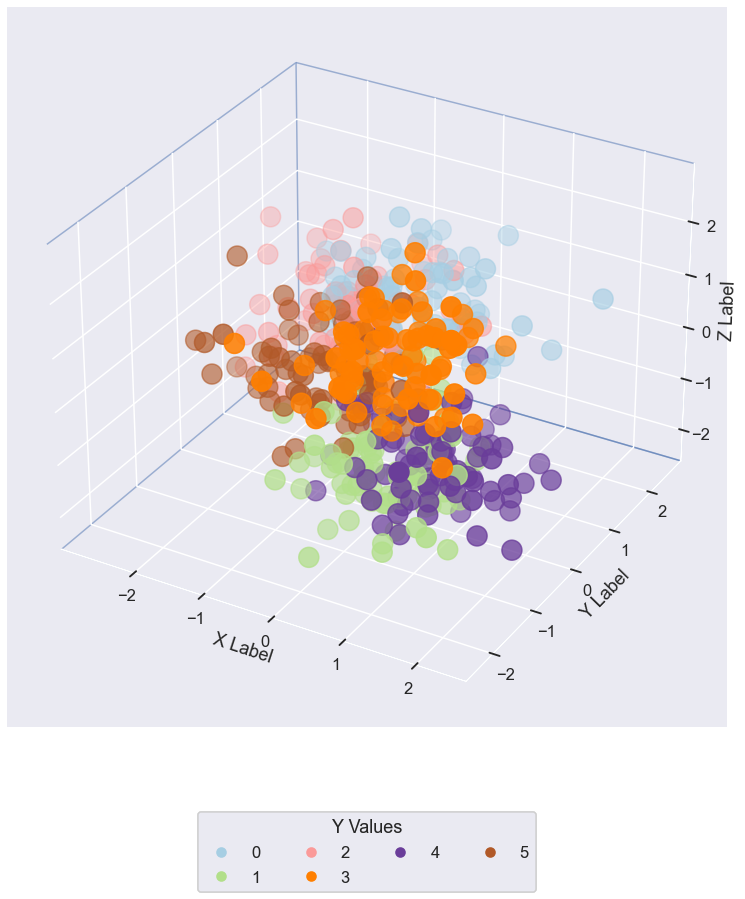

In [123]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plotc(X,y):
    sns.set_style("dark")

    fig = plt.figure(figsize=(10,22))

    ax = Axes3D(fig)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('b')
    ax.yaxis.pane.set_edgecolor('b')
    ax.zaxis.pane.set_edgecolor('b')



    g = ax.scatter(X.T[0], X.T[1], X.T[2], c=y, marker='o', depthshade=True, cmap='Paired',s=400)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*g.legend_elements(), loc="lower center", title="Y Values", borderaxespad=-10, ncol=4)
    ax.add_artist(legend)

    plt.show()
plotc(X,y)

In [124]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def predict(X,y,x,k):
    distances = [euclidean_distance(x, x_i) for x_i in X]


    nearest_neighbors_index = np.argsort(distances)[:k]


    nearest_neighbor_labels = [y[i] for i in nearest_neighbors_index]
    return np.argmax(np.bincount(nearest_neighbor_labels))

In [125]:

preds = [predict(X,y,xi,5)for xi in xtst]

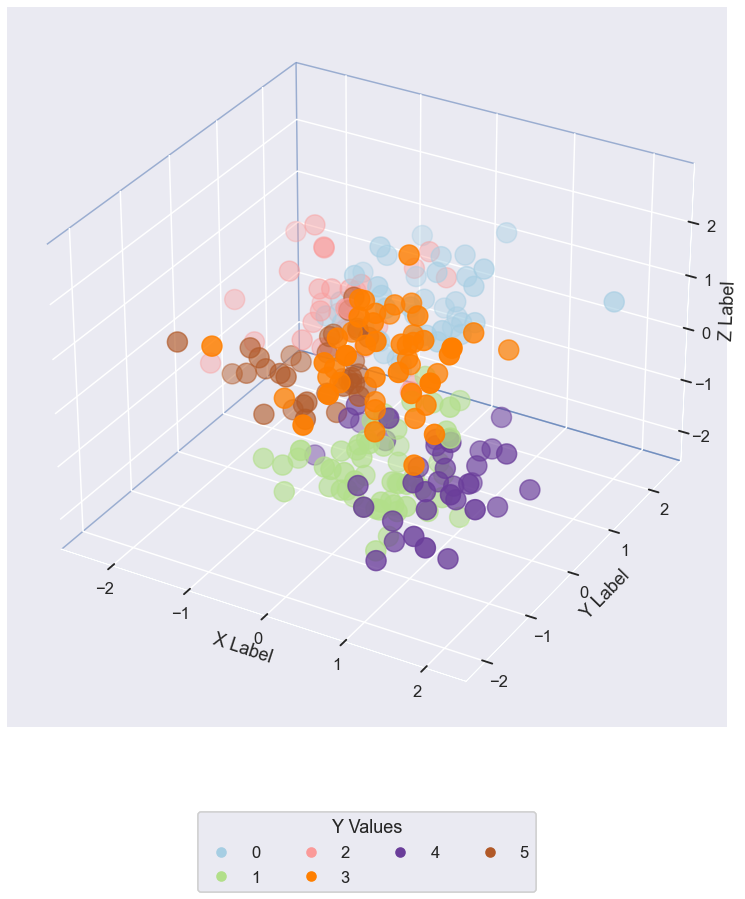

In [126]:
plotc(xtst,preds)